In [1]:
f2 = open("Data.txt","r")
lines = f2.readlines()

data=[]

times = 0

for i in lines:
    if len(i)<10:
        pass
    else:
        #print(i)
        times+=1
        data.append(i)

print("数据总行数：",len(lines))
print("有效行数：",times)
print("最终数据大小为：",len(data))

数据总行数： 5862
有效行数： 2932
最终数据大小为： 2932


In [2]:
for i in data:
    print(i)

Dual Super-Resolution Learning for Semantic Segmentation

Li Wang, Dong Li, Yousong Zhu, Lu Tian, Yi Shan

Deep Unfolding Network for Image Super-Resolution

Kai Zhang, Luc Van Gool, Radu Timofte

Unsupervised Learning for Intrinsic Image Decomposition From a Single Image

Yunfei Liu, Yu Li, Shaodi You, Feng Lu

COCAS: A Large-Scale Clothes Changing Person Dataset for Re-Identification

Shijie Yu, Shihua Li, Dapeng Chen, Rui Zhao, Junjie Yan, Yu Qiao

Dynamic Convolutions: Exploiting Spatial Sparsity for Faster Inference

Thomas Verelst, Tinne Tuytelaars

Alleviation of Gradient Exploding in GANs: Fake Can Be Real

Song Tao, Jia Wang

Forward and Backward Information Retention for Accurate Binary Neural Networks

Haotong Qin, Ruihao Gong, Xianglong Liu, Mingzhu Shen, Ziran Wei, Fengwei Yu, Jingkuan Song

Cooling-Shrinking Attack: Blinding the Tracker With Imperceptible Noises

Bin Yan, Dong Wang, Huchuan Lu, Xiaoyun Yang

Zooming Slow-Mo: Fast and Accurate One-Stage Space-Time Video Su

In [3]:
index = 1

title=[]
author=[]

for i in data:
    if index % 2 != 0:
        title.append(i)
        index+=1
    elif index % 2 == 0:
        author.append(i)
        index+=1
        
print(len(title))
print(len(author))

1466
1466


In [4]:
# 导入jieba包
import jieba
#管理系统路径
import sys
import jieba.posseg as pseg

In [5]:
#删除空格和转置符号的实用案例

p = list(jieba.cut_for_search(title[0]))
print(p)
for i in p:
    if i == ' ':
        p.remove(i)
p.remove(p[len(p)-1])
print(p)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.795 seconds.
Prefix dict has been built successfully.


['Dual', ' ', 'Super', '-', 'Resolution', ' ', 'Learning', ' ', 'for', ' ', 'Semantic', ' ', 'Segmentation', '\n']
['Dual', 'Super', '-', 'Resolution', 'Learning', 'for', 'Semantic', 'Segmentation']


In [6]:
D=[]
for i in title:
    p = list(jieba.cut_for_search(i))
    p.remove(p[len(p)-1])  #删除转置符号

    for n in p:
        if n == ' ':      #删除空格
            p.remove(n) 
    for n in p:
        if n == ':':      #删除冒号
            p.remove(n)
            
    for n in p:
        D.append(n)
            
print(len(D))

14604


In [7]:
from collections import Counter

In [8]:
r = Counter(D)
print(r)

Counter({'-': 1196, 'for': 664, 'Learning': 317, 'and': 239, 'Image': 193, 'With': 191, '3D': 147, 'to': 143, 'Object': 139, 'of': 128, 'Network': 127, 'in': 125, 'Deep': 123, 'Detection': 120, 'Segmentation': 115, 'From': 111, 'Neural': 103, 'Multi': 102, 'A': 98, 'via': 98, 'Networks': 96, 'Based': 93, 'Video': 90, 'Estimation': 87, 'Supervised': 85, 'the': 84, 'Recognition': 81, 'Using': 70, 'Domain': 65, 'Self': 65, 'Graph': 64, 'Pose': 64, 'a': 63, 'Human': 63, 'Visual': 63, 'Adversarial': 62, 'Point': 61, 'Semantic': 60, 'Aware': 60, 'Shot': 57, 'Attention': 57, 'Single': 54, 'Face': 54, 'by': 53, 'Unsupervised': 52, 'End': 46, 'on': 43, 'Adaptive': 43, 'Model': 43, 'Data': 42, 'Scale': 41, 'Search': 41, 'Scene': 40, 'Cross': 40, 'Efficient': 39, 'Temporal': 39, 'View': 39, 'Shape': 39, 'Reconstruction': 39, 'Feature': 39, 'Representation': 39, 'Adaptation': 38, 'Depth': 38, 'Convolutional': 38, 'Resolution': 37, 'Person': 37, ',': 37, 'Images': 37, 'Robust': 36, 'Towards': 36, '

In [9]:
import pandas as pd
df = pd.DataFrame(r.items(), columns=['key', 'times'])
df.sort_values("times",inplace=True)

dropDict=['-','for','on','via','and','A','a','From',
          'from','of','to','in','With','with','the','Based','Domain','Graph','Aware','Single','Shot',
          'Self','Using','using',',','by','End','Learning','Deep','Neural','Network','Networks','Image']

for i in dropDict:
    df = df.drop(df[df['key']==i].index)

In [10]:
tail = df.tail(20)

In [11]:
tail

,key,times
128,Adaptive,43
243,Model,43
12,Unsupervised,52
684,Face,54
228,Attention,57
6,Semantic,60
78,Point,61
276,Adversarial,62
198,Human,63
380,Visual,63


In [12]:
x=[]
y=[]
for row in tail.iterrows():
    x.append(row[1][0])
    y.append(row[1][1])
    
len(x),len(y)

(20, 20)

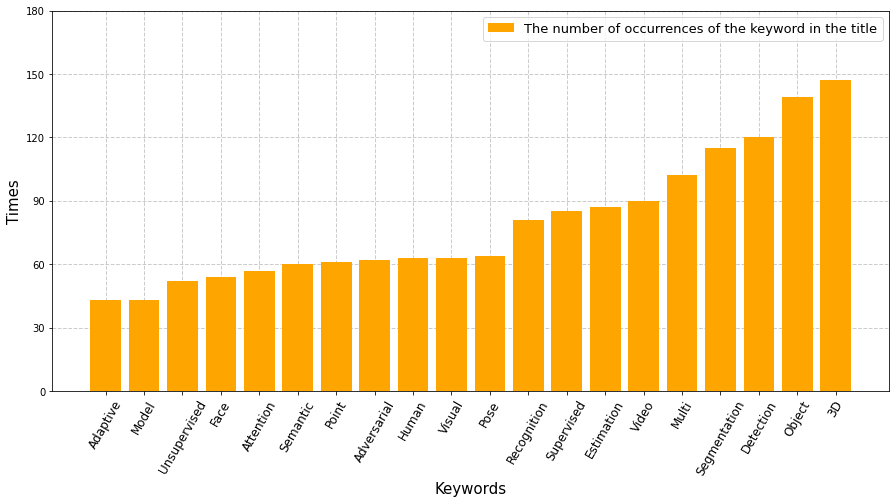

In [13]:
import matplotlib.pyplot as plt
import numpy as np

yticks=np.arange(0,210,30)

k = np.arange(len(x))  #首先用第一个的长度作为横坐标
width = 0.1    #设置柱与柱之间的宽度

fig,ax = plt.subplots(figsize=(15, 7))
ax.set_axisbelow(True)
 
ax.bar(k,y,label='The number of occurrences of the keyword in the title',alpha = 1,color= 'orange')

ax.set_xticks(k)#将坐标设置在指定位置
ax.set_xticklabels(x,size=12)#将横坐标替换成
ax.set_yticks(yticks)

ax.set_xlabel('Keywords',size=15)
ax.set_ylabel('Times',size=15)

plt.xticks(rotation=60)
plt.legend(fontsize=13)
plt.grid(linestyle = '--',linewidth =1, color= 'gray',alpha = 0.4)
# plt.savefig("The number of occurrences of the keyword in the title 2020.png",dpi=800)
plt.show()

In [14]:
author[0][:-1]

'Li Wang, Dong Li, Yousong Zhu, Lu Tian, Yi Shan'

In [15]:
author1=[]

authors=[]

for i in author:
    ls = i[:-1].split(", ")
#     print(len(ls))
#     print(ls)
    author1.append(ls[0])
    for k in ls:
        authors.append(k)
#print(author1)

t = Counter(author1)
countAuthors = Counter(authors)
#print(t)

au = pd.DataFrame(t.items(), columns=['key', 'times'])
at = pd.DataFrame(countAuthors.items(), columns=['key', 'times'])
au.sort_values("times",inplace=True)
at.sort_values("times",inplace=True)
at.tail(20)

,key,times
605,Ming-Hsuan Yang,8
193,Jiashi Feng,8
583,Hanwang Zhang,8
1208,Philip H.S. Torr,8
305,Dahua Lin,9
839,Fahad Shahbaz Khan,9
207,Chang Xu,9
276,Leonidas J. Guibas,9
455,Chen Change Loy,9
96,Alan L. Yuille,9


In [16]:
x1=[]
y1=[]
for row in au.tail(20).iterrows():
    x1.append(row[1][0])
    y1.append(row[1][1])
    
len(x1),len(y1)

(20, 20)

In [17]:
x2=[]
y2=[]
for row in at.tail(20).iterrows():
    x2.append(row[1][0])
    y2.append(row[1][1])
    
len(x2),len(y2)

(20, 20)

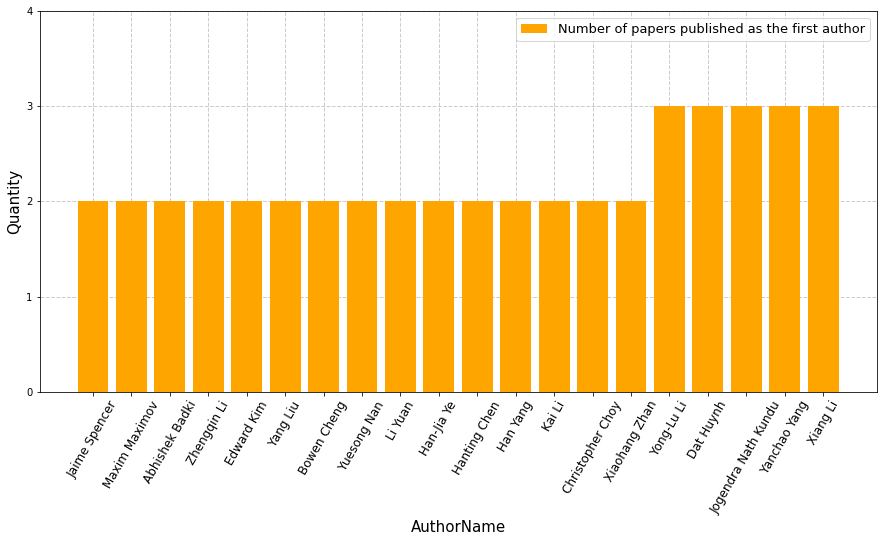

In [33]:
yticks=np.arange(0,5)

k = np.arange(len(x))  #首先用第一个的长度作为横坐标
width = 0.1    #设置柱与柱之间的宽度

fig,ax = plt.subplots(figsize=(15, 7))
ax.set_axisbelow(True)
 
ax.bar(k,y1,label='Number of papers published as the first author',alpha = 1,color= 'orange')

ax.set_xticks(k)#将坐标设置在指定位置
ax.set_xticklabels(x1,size=12)#将横坐标替换成
ax.set_yticks(yticks)

ax.set_xlabel('AuthorName',size=15)
ax.set_ylabel('Quantity',size=15)

plt.xticks(rotation=60)
plt.legend(fontsize=13)
plt.grid(linestyle = '--',linewidth =1, color= 'gray',alpha = 0.4)
# plt.savefig("Number of papers published as the first author 2020.png",dpi=800)
plt.show()

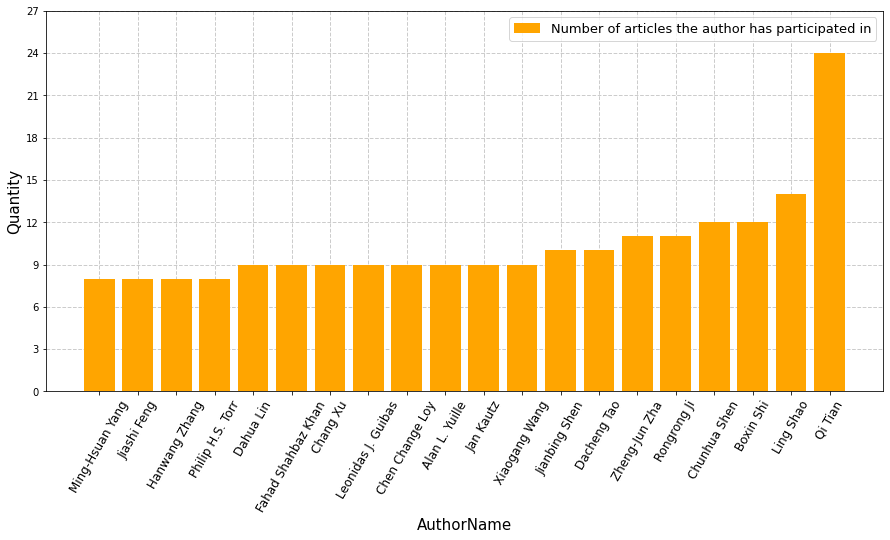

In [32]:
yticks=np.arange(0,30,3)

k = np.arange(len(x2))  #首先用第一个的长度作为横坐标
width = 0.1    #设置柱与柱之间的宽度

fig,ax = plt.subplots(figsize=(15, 7))
ax.set_axisbelow(True)
 
ax.bar(k,y2,label='Number of articles the author has participated in',alpha = 1,color= 'orange')

ax.set_xticks(k)#将坐标设置在指定位置
ax.set_xticklabels(x2,size=12)#将横坐标替换成
ax.set_yticks(yticks)

ax.set_xlabel('AuthorName',size=15)
ax.set_ylabel('Quantity',size=15)

plt.xticks(rotation=60)
plt.legend(fontsize=13)
plt.grid(linestyle = '--',linewidth =1, color= 'gray',alpha = 0.4)
# plt.savefig("Number of articles the author has participated in 2020.png",dpi=800)
plt.show()

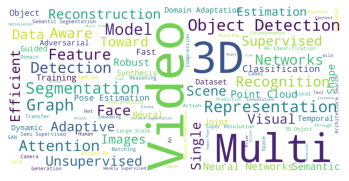

In [14]:

np=df.key
string_paper = ' '.join(D)
import numpy as np
from PIL import Image
import re
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
import  matplotlib.pyplot as plt

sw = {'-','for','on','via','and','A','a','From','Image','Deep','Network',
          'from','of','to','in','With','with','the','Based',
          'Self','Using','using',',','by','End','Learning'}


my_wordcloud = WordCloud(scale=8,stopwords=sw,background_color='white',max_words = 100,
                         max_font_size = 60,random_state=20).generate(string_paper) 
#显示生成的词云 
plt.imshow(my_wordcloud)
plt.axis("off") 
plt.show() 

#保存生成的图片
my_wordcloud.to_file('Keywords wordcloud 2020.png')
